In [225]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

from fourier_scale_calibration import FourierSpaceCalibrator, windowed_fft
from fourier_scale_calibration.structures import make_graphene, make_amourphous_contamination, cut_rectangle
from fourier_scale_calibration.simulate import simulate_2d_material, probe_profile

np.random.seed(0)

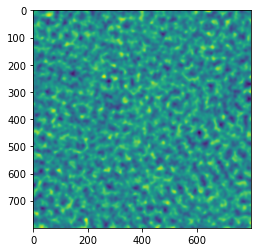

In [456]:
layers = 12

rotation = np.random.rand()*360
atoms = make_graphene((40,40), rotation=rotation, margin=5)

for i in range(layers - 1):
    rotation = np.random.rand()*360
    layer = make_graphene((40,40), rotation=rotation, margin=5)
    layer.positions[:,0] += 2.46*np.random.rand()
    layer.positions[:,1] += 2.46*np.random.rand()
    atoms += layer

image = simulate_2d_material(atoms, probe_profile(1.2, 1.3, .5), sampling=.05)
noisy_image = np.random.poisson(image * .01).astype(np.float32)

plt.imshow(gaussian_filter(noisy_image,5))

true sampling 0.05 detected sampling 0.05130422493309719


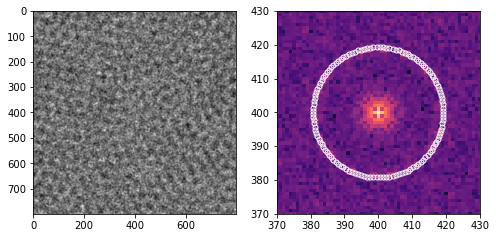

In [457]:
calibrator = FourierSpaceCalibrator('ring', lattice_constant=2.46, max_sampling=.1, min_sampling=.03, normalize=False)

f = np.abs(np.fft.fftshift(windowed_fft(noisy_image)))
spots = calibrator.get_spots(noisy_image)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,8))
ax1.imshow(gaussian_filter(noisy_image,2),cmap='gray')
ax2.imshow(f ** .1,cmap='magma')
ax2.plot(*spots.T,'wo', mfc='none', markersize=5)

n = 30
ax2.set_xlim(f.shape[0] // 2 - n, f.shape[0] // 2 + n)
ax2.set_ylim(f.shape[1] // 2 - n, f.shape[1] // 2 + n);

print('true sampling', 0.05, 'detected sampling', calibrator(noisy_image))